In [217]:

import os
os.chdir("C:\\Users\\derek\\Downloads") 


In [218]:
import hashlib

In [219]:
hashlib.md5("drt140030".encode('utf-8')).hexdigest()

## Pension data

'c37d47d82beb19f7ee5edd077cf7cb16'

In [378]:
import sqlite3
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as sp
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
import graphviz
import io
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [221]:
con = sqlite3.connect('wooldridge2.db')

In [222]:
df = pd.read_sql('SELECT * FROM pension',con)

In [223]:
labels = pd.read_sql('SELECT * FROM pension_labels',con)
labels

index variable name   type format                   variable label
0       0            id    int  %9.0g                family identifier
1       1        pyears   byte  %9.0g            years in pension plan
2       2       prftshr   byte  %9.0g        =1 if profit sharing plan
3       3        choice   byte  %9.0g   =1 if can choose method invest
4       4        female   byte  %9.0g                     =1 if female
5       5       married   byte  %9.0g                    =1 if married
6       6           age   byte  %9.0g                     age in years
7       7          educ   byte  %9.0g          highest grade completed
8       8        finc25   byte  %9.0g    $15,000 < faminc92 <= $25,000
9       9        finc35   byte  %9.0g    $25,000 < faminc92 <= $35,000
10     10        finc50   byte  %9.0g    $35,000 < faminc92 <= $50,000
11     11        finc75   byte  %9.0g    $50,000 < faminc92 <= $75,000
12     12       finc100   byte  %9.0g   $75,000 < faminc92 <= $100,000
13     13       finc101   byte  %9.0g              $100,000 < faminc92
14     14      wealth89  float  %9.0g           net worth, 1989, $1000
15     15         black   byte  %9.0g                      =1 if black
16     16      stckin89   byte  %9.0g        =1 if owned stock in 1989
17     17       irain89   byte  %9.0g            =1 if had IRA in 1989
18     18       pctstck   byte  %9.0g  0=mstbnds,50=mixed,100=mststcks

In [224]:
df.shape

(194, 20)

In [225]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 20 columns):
index       194 non-null int64
id          194 non-null int64
pyears      191 non-null float64
prftshr     194 non-null int64
choice      194 non-null int64
female      194 non-null int64
married     194 non-null int64
age         194 non-null int64
educ        194 non-null int64
finc25      194 non-null int64
finc35      194 non-null int64
finc50      194 non-null int64
finc75      194 non-null int64
finc100     194 non-null int64
finc101     194 non-null int64
wealth89    194 non-null float64
black       194 non-null int64
stckin89    194 non-null int64
irain89     194 non-null int64
pctstck     194 non-null int64
dtypes: float64(2), int64(18)
memory usage: 30.4 KB


In [226]:
df.isnull().values.any()

True

In [227]:
df.isnull().sum()

index       0
id          0
pyears      3
prftshr     0
choice      0
female      0
married     0
age         0
educ        0
finc25      0
finc35      0
finc50      0
finc75      0
finc100     0
finc101     0
wealth89    0
black       0
stckin89    0
irain89     0
pctstck     0
dtype: int64

In [228]:
df = df[np.isfinite(df['pyears'])]

In [229]:
df.isnull().values.any()

False

In [230]:
df = df.drop(['index','id'], axis = 1)

In [231]:
df.describe()

pyears     prftshr      choice      female     married         age  \
count  191.000000  191.000000  191.000000  191.000000  191.000000  191.000000   
mean    11.303665    0.209424    0.612565    0.607330    0.753927   60.518325   
std      9.513533    0.407967    0.488445    0.489628    0.431854    4.221303   
min      0.000000    0.000000    0.000000    0.000000    0.000000   54.000000   
25%      4.000000    0.000000    0.000000    0.000000    1.000000   57.000000   
50%      9.000000    0.000000    1.000000    1.000000    1.000000   60.000000   
75%     16.000000    0.000000    1.000000    1.000000    1.000000   64.000000   
max     45.000000    1.000000    1.000000    1.000000    1.000000   73.000000   

             educ      finc25      finc35      finc50      finc75     finc100  \
count  191.000000  191.000000  191.000000  191.000000  191.000000  191.000000   
mean    13.534031    0.209424    0.178010    0.235602    0.136126    0.136126   
std      2.572659    0.407967    0.383527    0.425490    0.343823    0.343823   
min      8.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     12.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%     12.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%     16.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     18.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          finc101     wealth89       black    stckin89     irain89     pctstck  
count  191.000000   191.000000  191.000000  191.000000  191.000000  191.000000  
mean     0.052356   211.983487    0.115183    0.340314    0.513089   48.429319  
std      0.223329   246.526824    0.320082    0.475060    0.501142   40.034774  
min      0.000000    -6.300000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    65.800000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000   140.000000    0.000000    0.000000    1.000000   50.000000  
75%      0.000000   253.450000    0.000000    1.000000    1.000000  100.000000  
max      1.000000  1484.997000    1.000000    1.000000    1.000000  100.000000

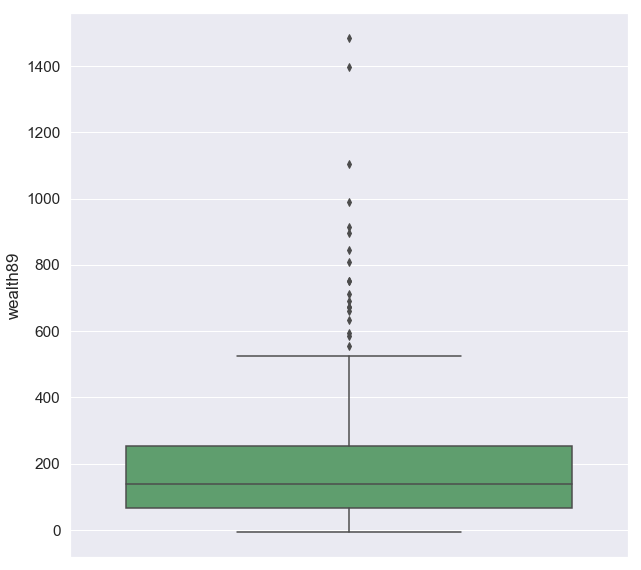

In [232]:
sns.boxplot(y=df["wealth89"], color = "g")
plt.show()

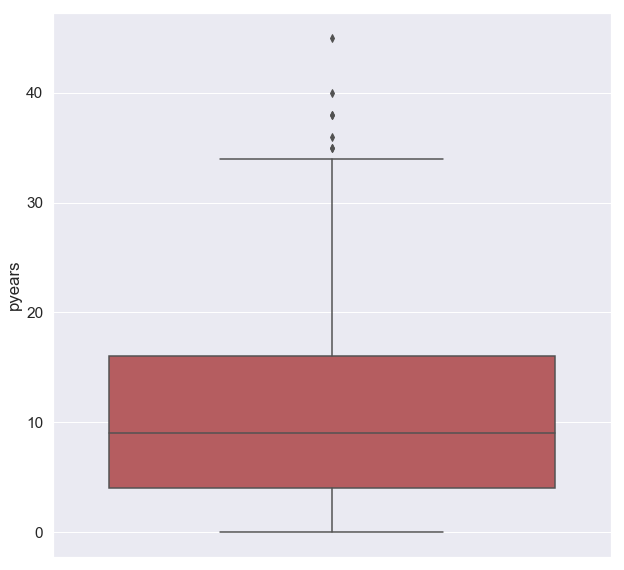

In [233]:
sns.boxplot( y=df["pyears"], color = "r")
plt.show()

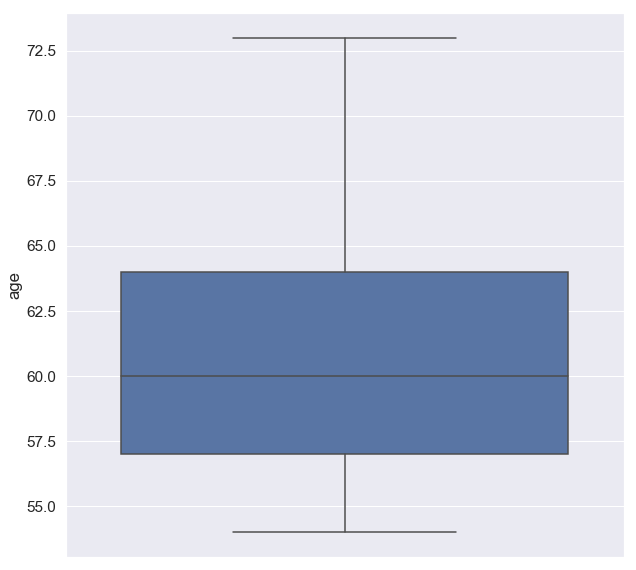

In [234]:
sns.boxplot( y=df["age"])
palette = sns.color_palette("bright")
plt.show()

In [235]:
dft = df[['wealth89']] + 6.30001
c = boxcox(dft, 0)
d = boxcox(dft, .5)



df = df.assign(logwealth89 = d, index=df.index)

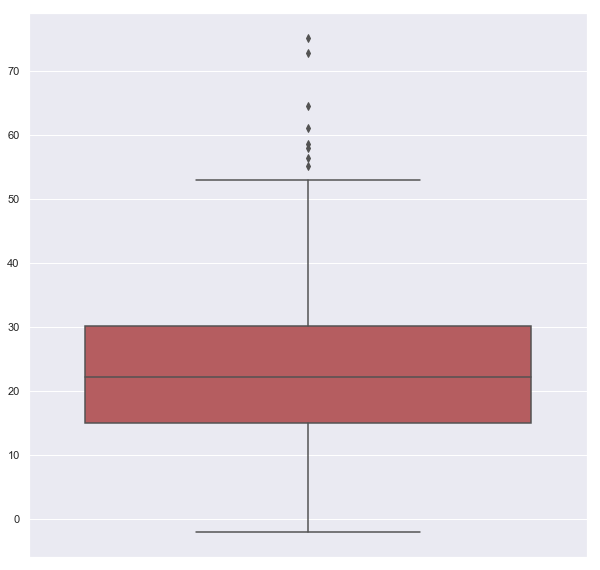

In [236]:
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(y=d, color = "r")
plt.show()

In [237]:
dft2 = df[['pyears']] + .00001
a = boxcox(dft2, 0)
b = boxcox(dft2, .5)

df = df.assign(logpyears = b, index=df.index)

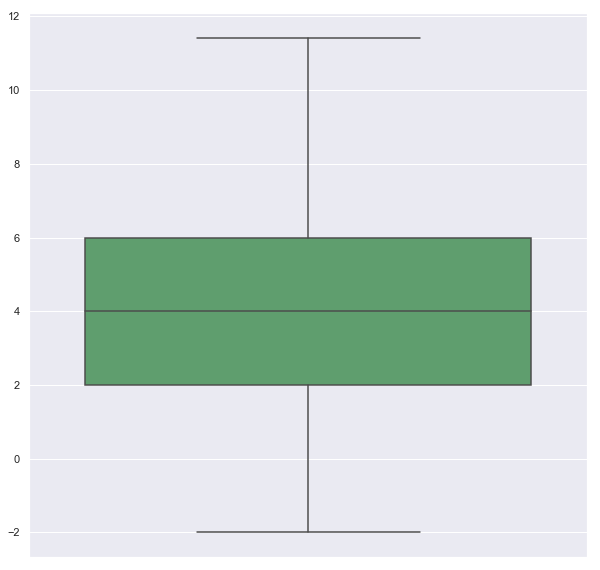

In [238]:
sns.boxplot(y=b, color = "g")
plt.show()

In [239]:
df.corr()

pyears   prftshr    choice    female   married       age  \
pyears       1.000000  0.129983 -0.155770 -0.356172  0.141265  0.269182   
prftshr      0.129983  1.000000 -0.198161 -0.060422  0.084928  0.034434   
choice      -0.155770 -0.198161  1.000000 -0.089296  0.044677 -0.047591   
female      -0.356172 -0.060422 -0.089296  1.000000 -0.459377 -0.344090   
married      0.141265  0.084928  0.044677 -0.459377  1.000000  0.200254   
age          0.269182  0.034434 -0.047591 -0.344090  0.200254  1.000000   
educ         0.081506 -0.097090  0.094316 -0.108417  0.057318 -0.037738   
finc25      -0.077494  0.082947 -0.224574  0.229411 -0.273553  0.028321   
finc35       0.084638 -0.071326  0.004854 -0.018196  0.011646  0.128011   
finc50      -0.026869  0.017462 -0.014320 -0.084123  0.002099 -0.056627   
finc75       0.038786  0.020824  0.253015 -0.181037  0.191337 -0.092385   
finc100      0.074185 -0.054220  0.002297 -0.118509  0.191337 -0.012607   
finc101     -0.069452 -0.063210  0.042186  0.044604  0.025143 -0.051268   
wealth89    -0.054070 -0.038899  0.068225 -0.122312  0.250017  0.179833   
black       -0.002905 -0.145394 -0.150696  0.189366 -0.288857 -0.157382   
stckin89    -0.133618  0.064834  0.094885 -0.056035  0.102483  0.069048   
irain89     -0.128895 -0.090707  0.106832 -0.011118  0.148716  0.157248   
pctstck      0.006786  0.116919  0.116749  0.035495  0.007969 -0.163330   
logwealth89  0.000025 -0.012303  0.075008 -0.169931  0.319080  0.197505   
index       -0.042723  0.007831 -0.014983 -0.002743  0.028588 -0.134660   
logpyears    0.971268  0.109055 -0.168291 -0.367192  0.119381  0.286097   

                 educ    finc25    finc35    finc50  ...   finc100   finc101  \
pyears       0.081506 -0.077494  0.084638 -0.026869  ...  0.074185 -0.069452   
prftshr     -0.097090  0.082947 -0.071326  0.017462  ... -0.054220 -0.063210   
choice       0.094316 -0.224574  0.004854 -0.014320  ...  0.002297  0.042186   
female      -0.108417  0.229411 -0.018196 -0.084123  ... -0.118509  0.044604   
married      0.057318 -0.273553  0.011646  0.002099  ...  0.191337  0.025143   
age         -0.037738  0.028321  0.128011 -0.056627  ... -0.012607 -0.051268   
educ         1.000000 -0.222455 -0.134193 -0.043424  ...  0.274393  0.143450   
finc25      -0.222455  1.000000 -0.239514 -0.285740  ... -0.204308 -0.120977   
finc35      -0.134193 -0.239514  1.000000 -0.258357  ... -0.184729 -0.109383   
finc50      -0.043424 -0.285740 -0.258357  1.000000  ... -0.220381 -0.130494   
finc75       0.119689 -0.204308 -0.184729 -0.220381  ... -0.157576 -0.093305   
finc100      0.274393 -0.204308 -0.184729 -0.220381  ...  1.000000 -0.093305   
finc101      0.143450 -0.120977 -0.109383 -0.130494  ... -0.093305  1.000000   
wealth89     0.189637 -0.179123 -0.141535 -0.043167  ...  0.143450  0.220291   
black       -0.011177  0.056132  0.089339 -0.007082  ... -0.047574 -0.084806   
stckin89     0.052917  0.010521 -0.189807 -0.034218  ...  0.069338 -0.069607   
irain89      0.006797  0.012265 -0.094337  0.071852  ...  0.050696 -0.100208   
pctstck      0.038847 -0.124764  0.052583  0.052736  ...  0.053851 -0.108486   
logwealth89  0.231343 -0.180737 -0.152250 -0.041719  ...  0.183826  0.151140   
index        0.094974  0.001388 -0.095233  0.069451  ... -0.066314 -0.022065   
logpyears    0.086177 -0.072911  0.105455 -0.030404  ...  0.042949 -0.068773   

             wealth89     black  stckin89   irain89   pctstck  logwealth89  \
pyears      -0.054070 -0.002905 -0.133618 -0.128895  0.006786     0.000025   
prftshr     -0.038899 -0.145394  0.064834 -0.090707  0.116919    -0.012303   
choice       0.068225 -0.150696  0.094885  0.106832  0.116749     0.075008   
female      -0.122312  0.189366 -0.056035 -0.011118  0.035495    -0.169931   
married      0.250017 -0.288857  0.102483  0.148716  0.007969     0.319080   
age          0.179833 -0.157382  0.069048  0.157248 -0.163330     0.197505   
educ         0.189637 -0.011177  0.052917  0.006797  0.03

In [240]:
%matplotlib inline

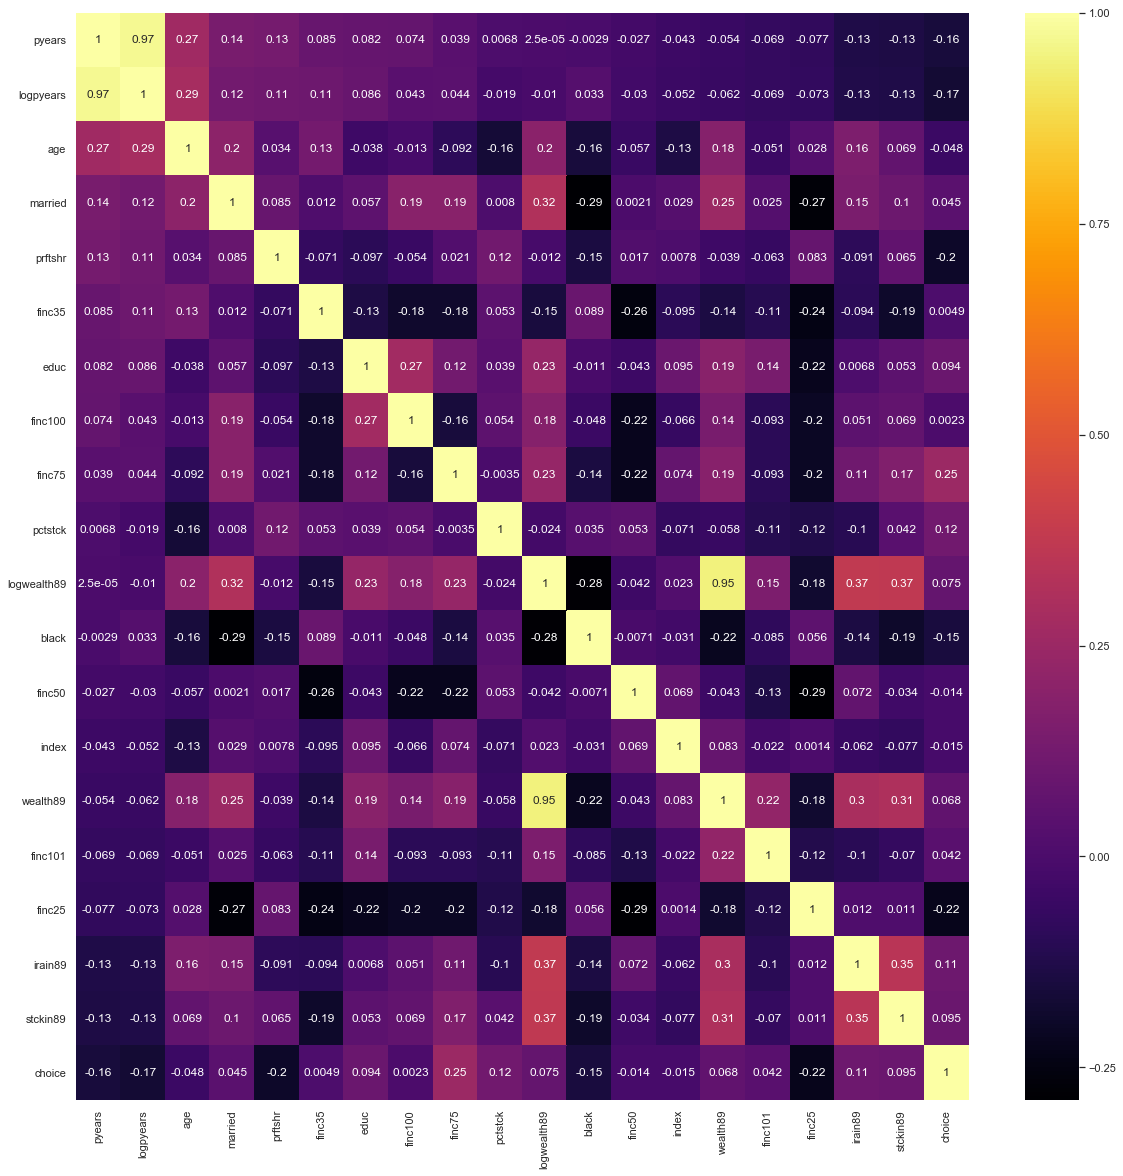

In [241]:
sns.set(rc={'figure.figsize':(20,20)})
k = 20
cols = df.corr().nlargest(k, 'pyears')['pyears'].index
cm = df[cols].corr()
sns.heatmap(cm, annot=True, cmap = 'inferno')






Text(0.5, 0, 'Logwealth89')

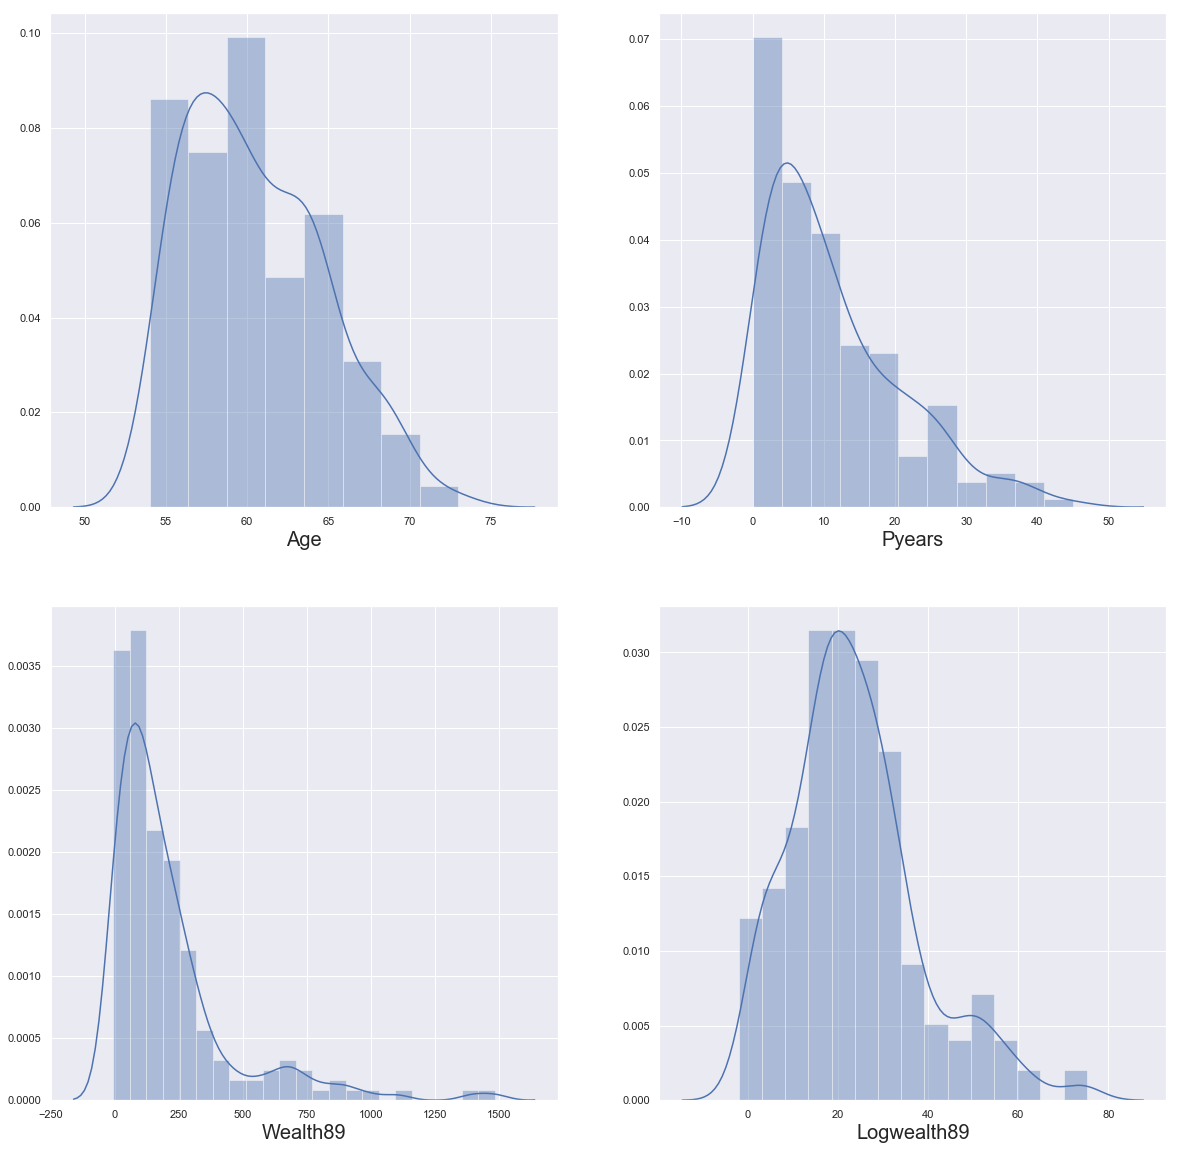

In [242]:
fig = plt.figure()

a = plt.subplot(2, 2, 1)
sns.distplot(df['age'])

b = plt.subplot(2, 2, 2)
sns.distplot(df['pyears'])

c = plt.subplot(2, 2, 3)
sns.distplot(df['wealth89'])

d = plt.subplot(2, 2, 4)
sns.distplot(df['logwealth89'])

a.axes.set_xlabel("Age",fontsize=20)
b.axes.set_xlabel("Pyears",fontsize=20)
c.axes.set_xlabel("Wealth89",fontsize=20)
d.axes.set_xlabel("Logwealth89",fontsize=20)




Text(0.5, 0, 'Logpyears')

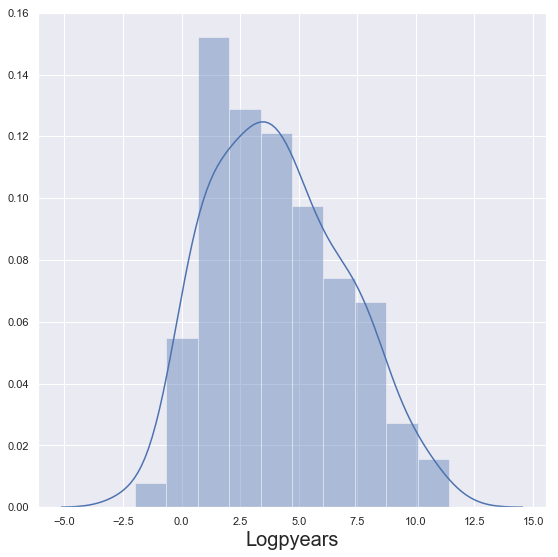

In [243]:
fig = plt.figure()

e = plt.subplot(2, 2, 1)
sns.distplot(df['logpyears'])
e.axes.set_xlabel("Logpyears",fontsize=20)

In [244]:
df2 = df[['finc25','finc35','finc50','finc75','finc100','finc101']]
a = df['finc25'].sum() 
b = df['finc35'].sum() 
c = df['finc50'].sum() 
d = df['finc75'].sum() 
e = df['finc100'].sum() 
f = df['finc101'].sum() 


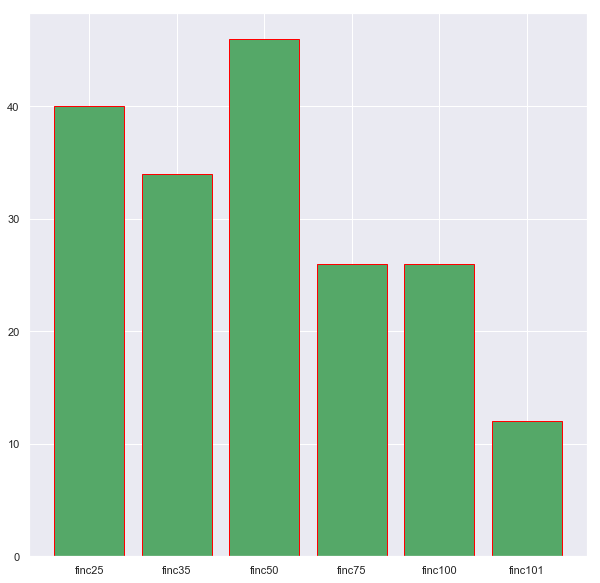

In [245]:
sns.set(rc={'figure.figsize':(10,10)})
inc = [40,34,46,26,26,12]
bars = ('finc25','finc35','finc50','finc75','finc100','finc101')
y_pos = np.arange(len(bars))
plt.bar(y_pos, inc, color=('g'),  edgecolor='red')
plt.xticks(y_pos, bars)
plt.show()

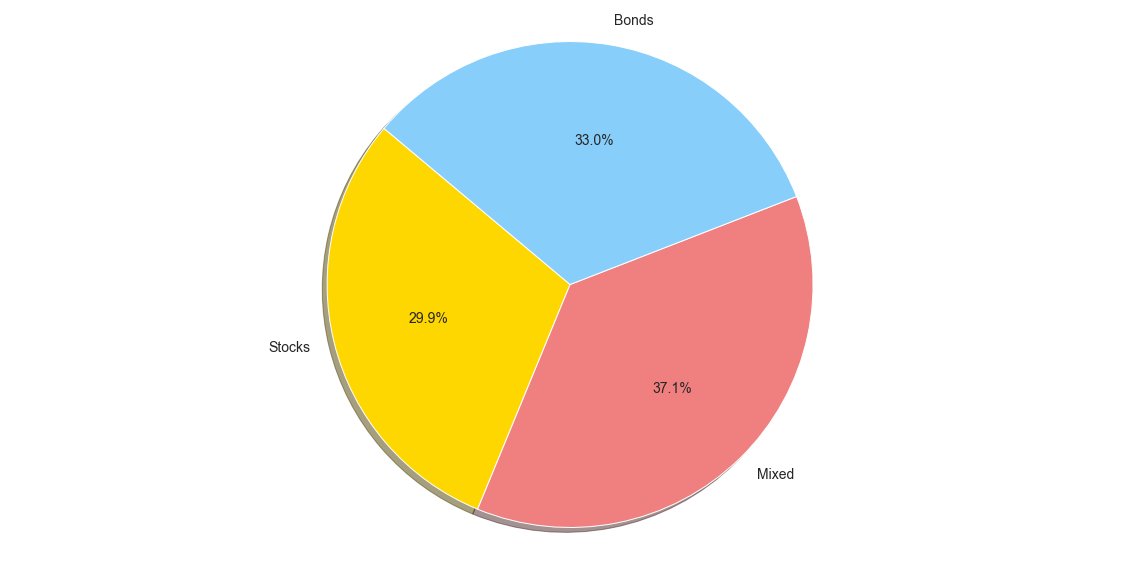

In [246]:
plt.rcParams['font.size'] = 15.0
plt.figure(figsize=(20,10))
labels = 'Stocks', 'Mixed', 'Bonds'
sizes = [58,72,64]
colors = ['gold', 'lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})

plt.axis('equal')
plt.show()

In [247]:
X = df.drop('choice', axis = 1)
y = df[['choice']]
y = np.ravel(y)
y = y.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.39)

In [248]:
model = LogisticRegression()
rfe = RFECV(model)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 4
Selected Features: [False  True False False False False  True False False  True False False
 False  True False False False False False False]
Feature Ranking: [11  1  5  4 12 10  1  6  8  1  9 13 17  1  3  2 15 14 16  7]


C:\Users\derek\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\derek\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\derek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\derek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\derek\Anaconda3\lib\site-packages\skl

In [249]:
df2 = df[['prftshr','educ','black']]
X2 = df2
y = df[['choice']]
X2_train, X2_test, y_train, y_test = train_test_split(df2, y, test_size=0.39)

In [250]:

logit_model=sm.Logit(y,X2)
LogitResults=logit_model.fit()
print(LogitResults.summary2())

Optimization terminated successfully.
         Current function value: 0.629126
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.058     
Dependent Variable: choice           AIC:              246.3261  
Date:               2019-07-07 18:44 BIC:              256.0829  
No. Observations:   191              Log-Likelihood:   -120.16   
Df Model:           2                LL-Null:          -127.51   
Df Residuals:       188              LLR p-value:      0.00064515
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
prftshr   -1.0960     0.3668   -2.9876   0.0028   -1.8150   -0.3770
educ       0.0628     0.0138    4.5411   0.0000    0.0357 

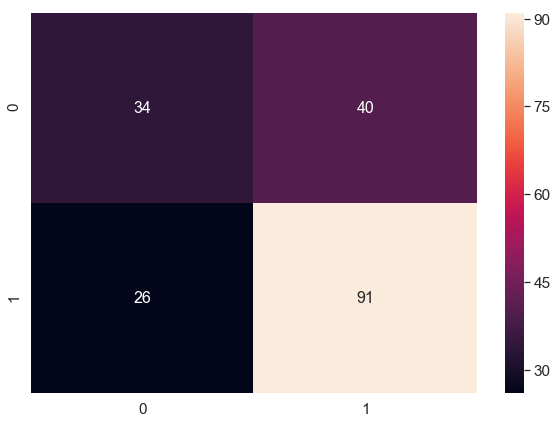

In [251]:
a = LogitResults.pred_table(threshold=0.5)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(a, annot=True,annot_kws={"size": 16})

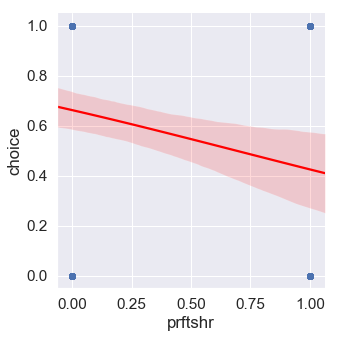

In [252]:
sns.set_palette("deep")
sns.lmplot(x="prftshr", logistic=True, y="choice", data=df, line_kws={'color': 'red'})
plt.show()


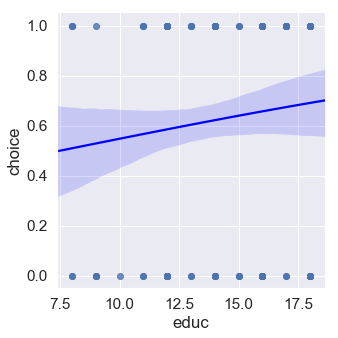

In [253]:
sns.lmplot(x="educ", logistic=True, y="choice", data=df, line_kws={'color': 'blue'})
plt.show()

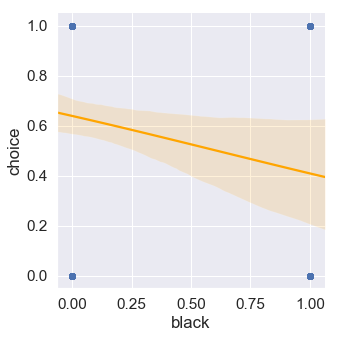

In [254]:
sns.lmplot(x="black", logistic=True, y="choice", data=df, line_kws={'color': 'orange'})
plt.show()

In [381]:
df3 = df[['prftshr','age','logwealth89','pyears']]
X3 = df3
y = df[['choice']]
X3_train, X3_test, y_train, y_test = train_test_split(df3, y, test_size=0.39)


In [382]:
model = DecisionTreeClassifier()
results = model.fit(X3_train, y_train)
y_predict = model.predict(X3_test)
accuracy_score(y_test, y_predict)


0.64

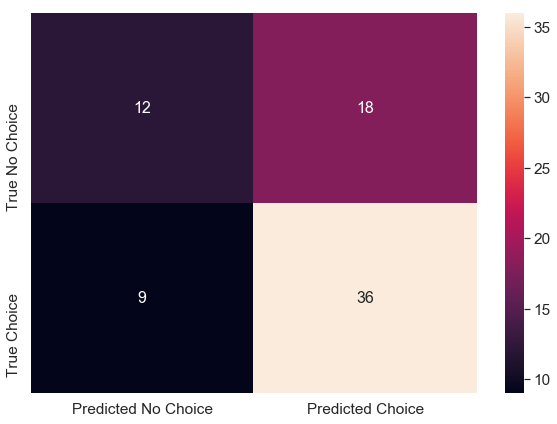

In [383]:
treecon = pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted No Choice', 'Predicted Choice'],
    index=['True No Choice', 'True Choice']
)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(treecon, annot=True,annot_kws={"size": 16})

In [384]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='tree.dot', 
                feature_names = X3.columns,
                class_names = True,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
model.feature_importances_

In [294]:
X4 = df[['married','educ','black','stckin89','irain89']]
df4 = X4
y4 = df[['logwealth89']]
y4 = np.array(y4)
y4 = np.ravel(y4)
X4_train, X4_test, y4_train, y4_test = train_test_split(df, y, test_size=0.39)


In [295]:
est=sm.OLS(y4, X4)
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     166.5
Date:                Sun, 07 Jul 2019   Prob (F-statistic):           1.08e-66
Time:                        18:55:36   Log-Likelihood:                -743.88
No. Observations:                 191   AIC:                             1498.
Df Residuals:                     186   BIC:                             1514.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
married        6.7053      2.054      3.265      0.001       2.654      10.757
educ           1.0066      0.145      6.966      0.000       0.722       1.292
black         -6.6107      2.855     -2.316      0.022     -12.243      -0.979
stckin89       6.9117      1.986      3.480      0.001       2.993      10.830
irain89        6.9291      1.858      3.729      0.000       3.263      10.595
==============================================================================
Omnibus:                       41.258   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.925
Skew:                           1.079   Prob(JB):                     8.86e-17
Kurtosis:                       5.153   Cond. No.                         46.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

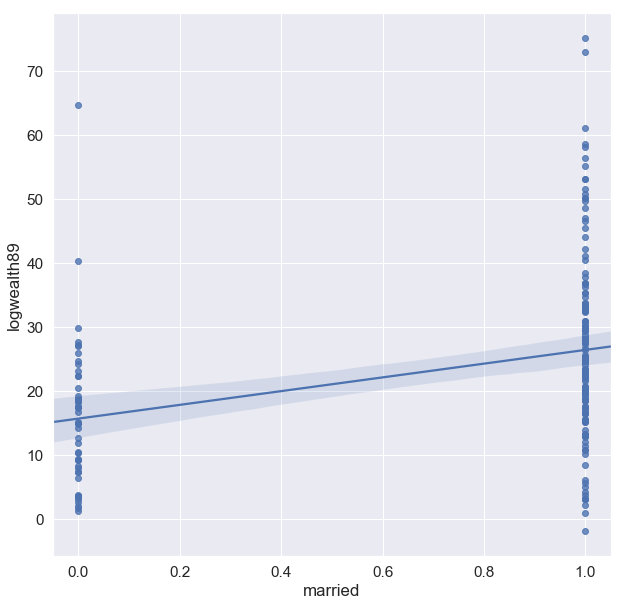

In [297]:
sns.regplot(x='married', y='logwealth89', data=df)

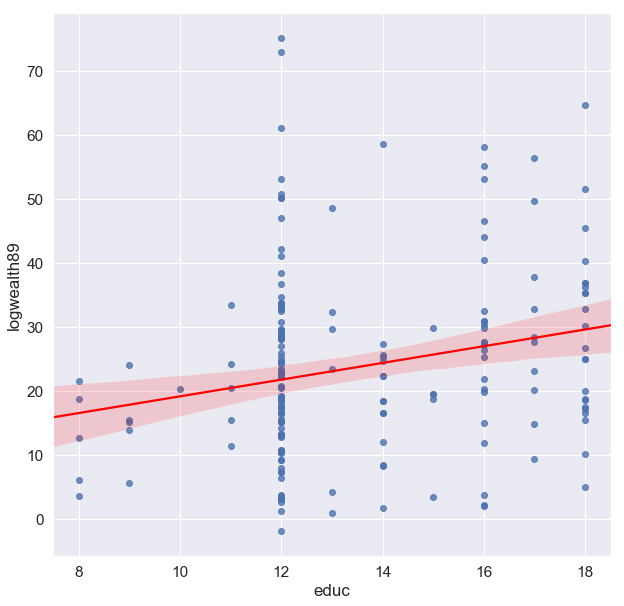

In [298]:
sns.regplot(x='educ', y='logwealth89', line_kws={'color': 'red'}, data=df)


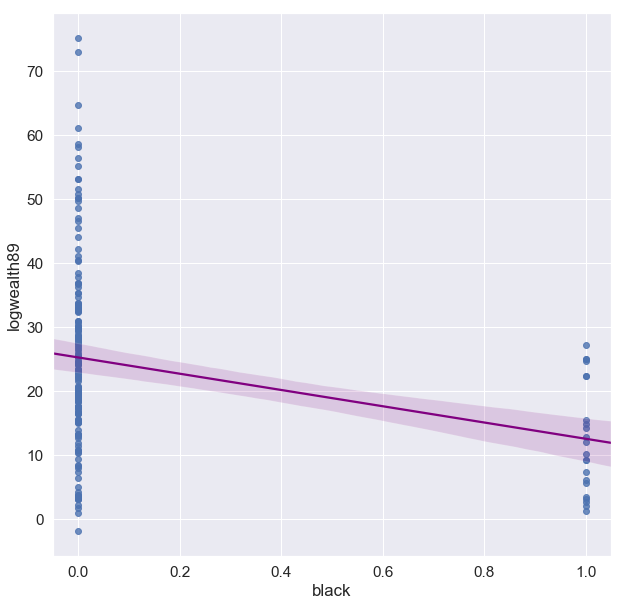

In [299]:
sns.regplot(x='black', y='logwealth89', line_kws={'color': 'purple'}, data=df)

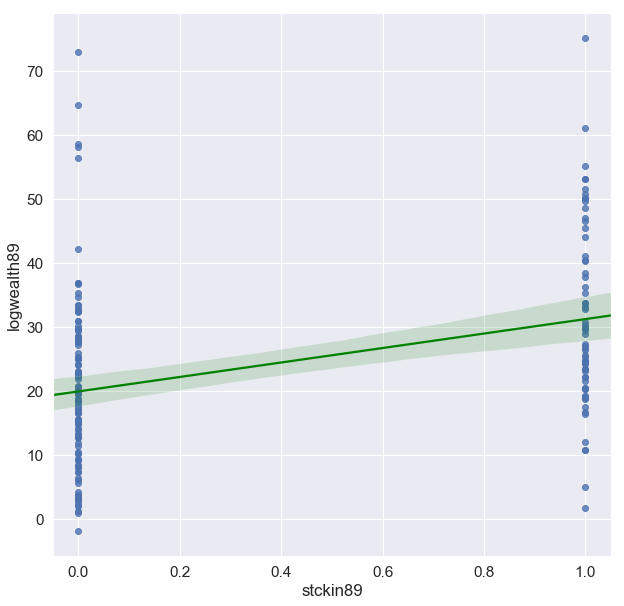

In [300]:
sns.regplot(x='stckin89', y='logwealth89', line_kws={'color': 'green'}, data=df)



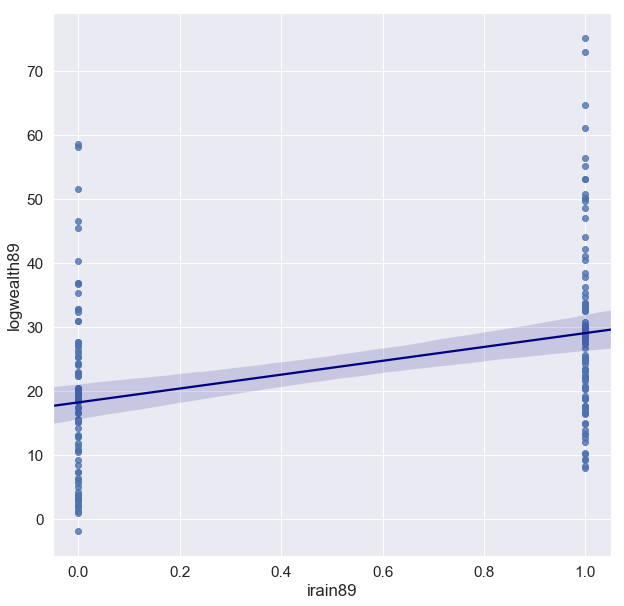

In [301]:
sns.regplot(x='irain89', y='logwealth89', line_kws={'color': 'navy'}, data=df)

In [367]:
X6 = df[['choice','female','married','stckin89','irain89','finc25','finc35','finc50','finc75','finc100','finc101','black','age','educ','pctstck','pyears','wealth89']]
y6 = df[['prftshr']]
y6 = np.ravel(y6)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.39)

C:\Users\derek\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\derek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Feature ranking:
1. feature 15 (0.185932)
2. feature 12 (0.172378)
3. feature 16 (0.164411)
4. feature 13 (0.089568)


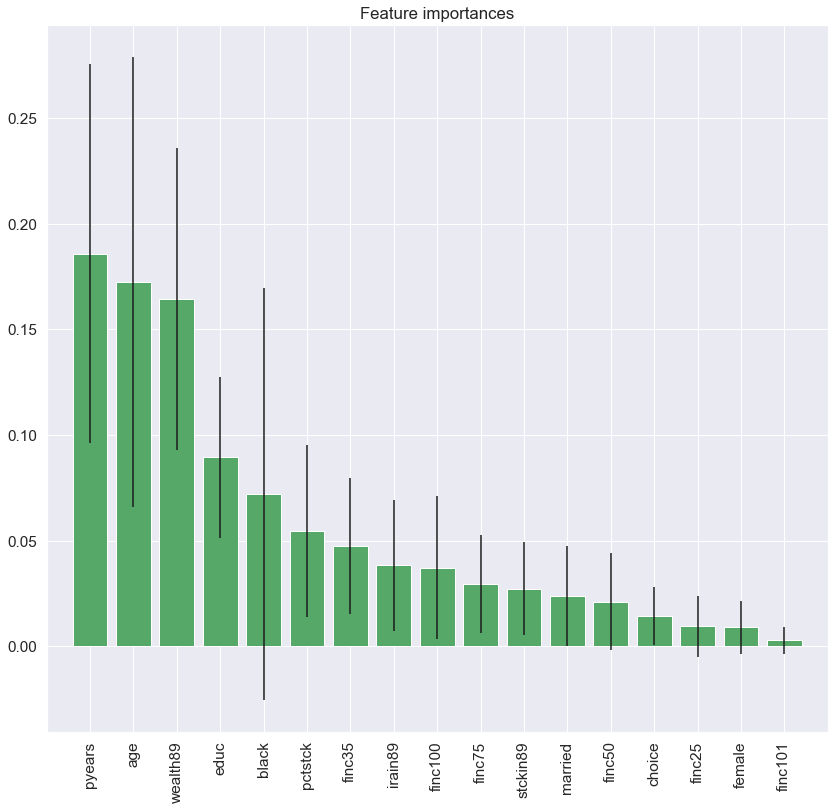

In [370]:
clf = RandomForestClassifier()      
clr = clf.fit(X6_train,y_train)
importance = clr.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importance)[::-1]

print("Feature ranking:")

for f in range(X3_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importance[indices[f]]))


plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X6_train.shape[1]), importance[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X6_train.shape[1]), X6_train.columns[indices],rotation=90)
plt.xlim([-1, X6_train.shape[1]])
plt.show()

In [360]:
X7 = df[['educ','pyears']]
y7 = df[['prftshr']]
y7 = np.ravel(y7)
y7 = y7.reshape(-1,1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.45)

In [356]:
logit_model=sm.Logit(y7,X7)
LogitResults=logit_model.fit()
print(LogitResults.summary2())

Optimization terminated successfully.
         Current function value: 0.501793
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.022   
Dependent Variable: y                AIC:              195.6848
Date:               2019-07-07 20:01 BIC:              202.1893
No. Observations:   191              Log-Likelihood:   -95.842 
Df Model:           1                LL-Null:          -98.020 
Df Residuals:       189              LLR p-value:      0.036904
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
educ        -0.1309    0.0249  -5.2581  0.0000  -0.1797  -0.0821
logpyears    0.0987    0.0623   1.5836  0.1133  -0.0235   0.2209



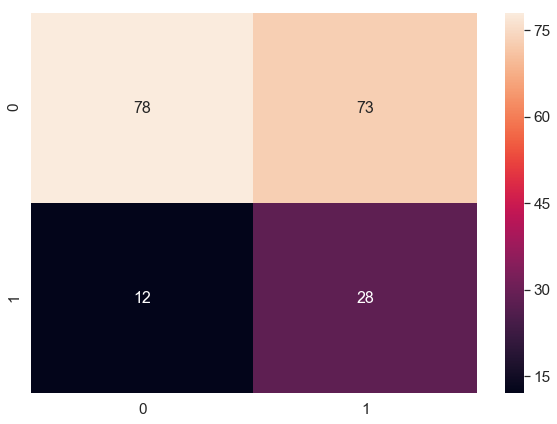

In [357]:
b = LogitResults.pred_table(threshold=0.2)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(b, annot=True,annot_kws={"size": 16})

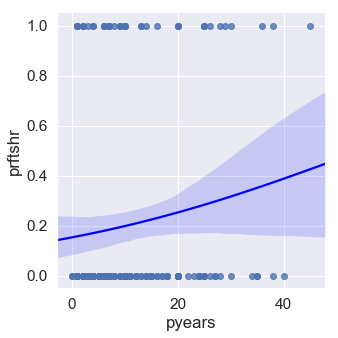

In [359]:
sns.lmplot(x="pyears", logistic=True, y="prftshr", data=df, line_kws={'color': 'blue'})
plt.show()

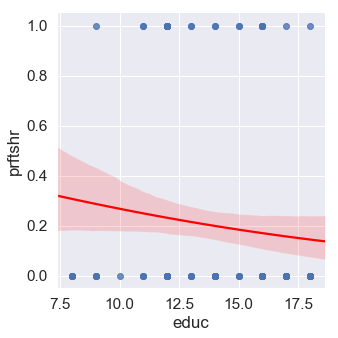

In [344]:
sns.lmplot(x="educ", logistic=True, y="prftshr", data=df, line_kws={'color': 'red'})
plt.show()

In [371]:
X7 = df[['prftshr','choice','female','finc35','educ']]
y7 = df[['logpyears']]
y7 = np.ravel(y7)
X7_train, X7_test, y7_train, y7_test = train_test_split(df, y, test_size=0.39)

In [372]:
OLSmodel=sm.OLS(y7, X7)
result = OLSmodel.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.713   
Dependent Variable: y                AIC:                921.9172
Date:               2019-07-07 20:08 BIC:                938.1786
No. Observations:   191              Log-Likelihood:     -455.96 
Df Model:           5                F-statistic:        95.75   
Df Residuals:       186              Prob (F-statistic): 1.53e-49
R-squared:          0.720            Scale:              7.1213  
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
prftshr    0.9133     0.4746    1.9246   0.0558   -0.0229    1.8495
choice    -0.8322     0.3998   -2.0815   0.0388   -1.6209   -0.0434
female    -1.5958     0.3770   -4.2325   0.0000   -2.3396   -0.8520
finc35     1.2995     0.4987    2.6058   0.0099    0.3157    2.2833
educ       0.3723     0.0299   12.4417   0.0000    0.3133    0.4314
-----------------------------------------------------------------
Omnibus:              2.903        Durbin-Watson:           1.930
Prob(Omnibus):        0.234        Jarque-Bera (JB):        2.820
Skew:                 0.241        Prob(JB):                0.244
Kurtosis:             2.651        Condition No.:           36   
=================================================================

"""

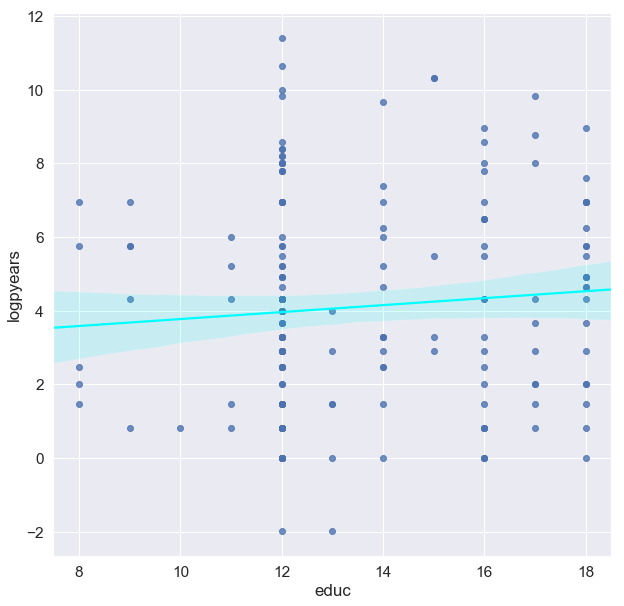

In [373]:
sns.regplot(x='educ', y='logpyears', line_kws={'color': 'aqua'}, data=df)

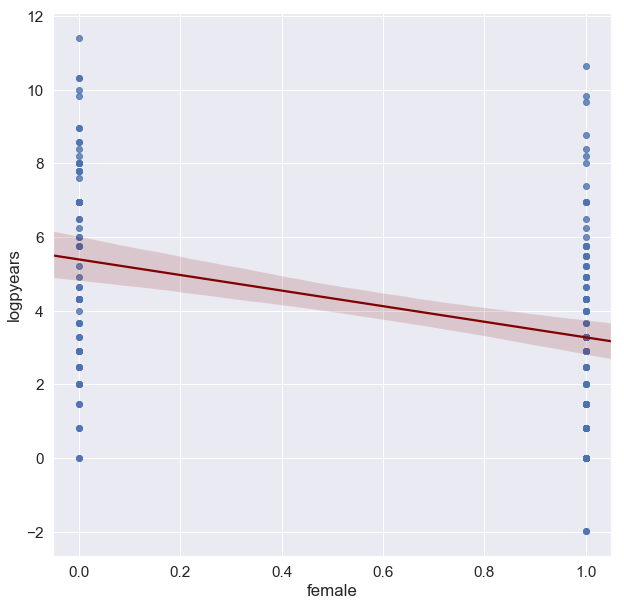

In [374]:
sns.regplot(x='female', y='logpyears', line_kws={'color': 'maroon'}, data=df)

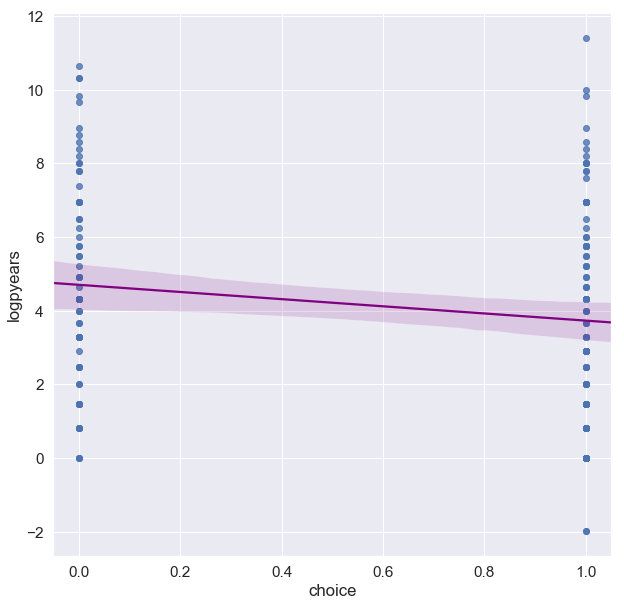

In [375]:
sns.regplot(x='choice', y='logpyears', line_kws={'color': 'purple'}, data=df)

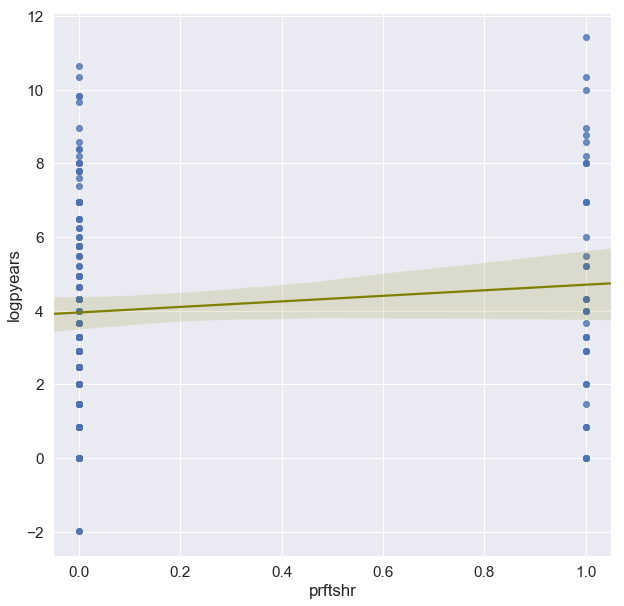

In [376]:
sns.regplot(x='prftshr', y='logpyears', line_kws={'color': 'olive'}, data=df)

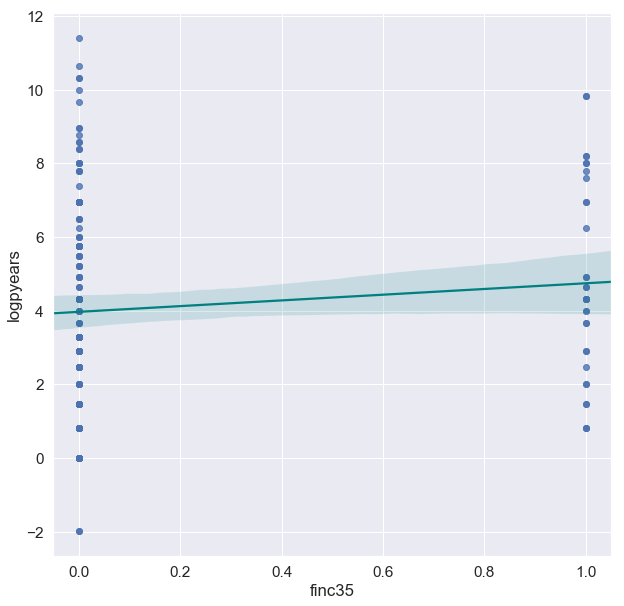

In [377]:
sns.regplot(x='finc35', y='logpyears', line_kws={'color': 'teal'}, data=df)